In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

1. Facial recognition
2. Let's predict gender, age and etnicity of person from given picture
3. It is supervised classification
4. Performance will be measured in terms of accuracy for each of given categories

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

1. We will use "age, gender and etnicity face data" dataset from kaggle available at: https://www.kaggle.com/code/sanjay7013/age-gender-ethnicity-recognition/data  

It is a picture dataset with labels containing gender, age and etnicity information

-age is an integer from 0 to 116, indicating the age  
-gender is either 0 (male) or 1 (female)  
-etnicity is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).  

WE DECIDED TO SPLIT WORK IN FOLLOWING WAY: JULIA - AGE , NIKITA - GENDER, DANIEL - ETHNICITY CLASSIFICATION

In [3]:
df = pd.read_csv('datasets/7/age_gender.csv')

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

In [4]:
#display data to see columns and describe to see distribution etc.
display(df)
df.describe()


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


### Age - Julia
Firstly I want to see how data is distributed so I plot following chart from age data

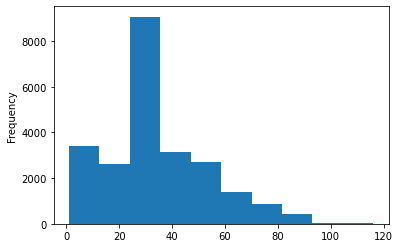

In [14]:

df['age'].plot(kind="hist")
plt.show()


Data is not symetrical, half of images show people below 29 year. Age data is right skewed. Mean is 33 years old while the oldest person pictured is 116 yo. Pictures of people above 90 yo are outliers.  


### Ethnicity - Daniel

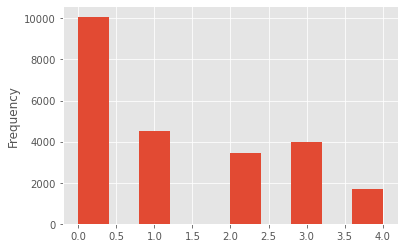

In [16]:
df['ethnicity'].plot(kind="hist")
plt.show()

There is way more pictures of white people than all other ethinicities available in dataset. what if we just delete half of them to keep it all even xd. 

#### Visualize pictures examples

In [5]:
#pixels is long string so we need to seperate it and cast to int each pixel value
pictures = []
for a in df["pixels"]:
    pictures.append(list(map(lambda e: int(e), a.split(" ")))) #/255


2304 pixels


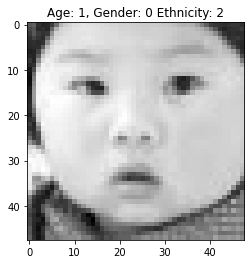

In [6]:

i = 105 #change it to number up to 23705 to see other pictures

pictures = np.array(pictures)
sample = pictures[i]
print(sample.size, "pixels")

plt.title("Age: {}, Gender: {} Ethnicity: {}".format(df['age'][i],df['gender'][i],df['ethnicity'][i]))
plt.imshow(sample.reshape(48,48), cmap='gray')
plt.show()

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

We only care about picture data and labels  
Devide by 255 to scale each pixel to value between 0 and 1 

In [27]:
scaled = pictures/255

### Age
Bin age values into 6 categories: 0-10, 10-25, 25-30, 30-45, 45-64, 64-116. Later will experiment with different bins to find best ones.

C:\Users\tanki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age bins')

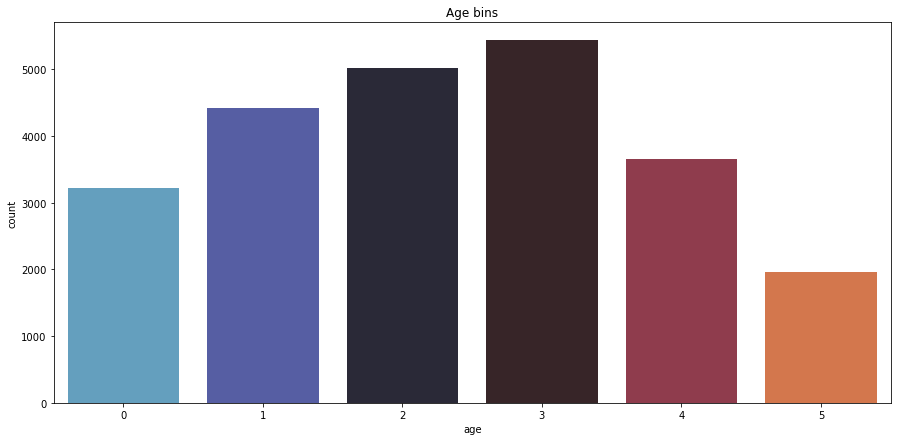

In [8]:

#age_map = {0:"0-3",1:"3-18",2:"18-45",3:"45-64",4:"64-116"}
#bins=[0,6,18,25,30,45,64,116],labels=["0","1","2","3","4","5","6"]
ages = pd.cut(df["age"],bins=[0,10,25,30,45,64,116],labels=["0","1","2","3","4","5"])#pd.qcut(df['age'], 10,labels = ["0-6","6-20","20-25","25-26","26-29","29-34","34-40","40-50","50-61","61-116"])

plt.figure(figsize=(15,7))
g = sns.countplot(ages, palette="icefire")
plt.title("Age bins")

In [9]:
#Convert a class integers to binary class matrix.
y = to_categorical(ages, 6)
x = scaled

X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify = y,random_state=69)
print(X_train.shape)
Y_train.shape

(17778, 2304)


(17778, 6)

### Ethnicity

In [21]:
y_ethnicity = to_categorical(df['ethnicity'], 5)
x = pictures/255

X_train_ethnicity, X_test_ethnicity, Y_train_ethnicity, Y_test_ethnicity = train_test_split(x, y_ethnicity, stratify = y_ethnicity,random_state=69)
print(X_train_ethnicity.shape)
Y_train_ethnicity.shape

(17778, 2304)


(17778, 5)

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### Age
##### K Neighbors Classifier 
Age case is supervised multi class classification. It could be 116 classes(ages available in data set) to give precise age prediction. However, I would have to get rid of outliers to get each class sufficiently represented and it would be pretty hard to get satisfying accuracy in the end so I decided to bin it into 6 classes and count on at least 50% accuracy using CNN model. Firstly will use K-neighbours to see how well it can perform and to compare it with Convolutional Neural Network later.

In [20]:
scaled = pictures/255
scaled = np.around(scaled,2)
x = scaled
#split again after reshaping pictures
X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify = y,random_state=69)



knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print("Model accuracy on the original/test? data: {}".format(knn.score(X_test,Y_test)))
print("Model accuracy on the train data: {}".format(knn.score(X_train,Y_train)))

Model accuracy on the original/test? data: 0.2063438501771554
Model accuracy on the train data: 0.35791427607154913


Pretty bad taking into account fact that there are only 6 classes

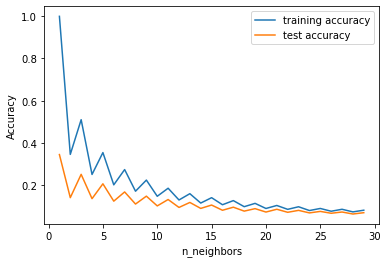

In [36]:
training_accuracy = []
test_accuracy = []

ks = range(1, 30)

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, Y_test))
    
plt.plot(ks, training_accuracy, label="training accuracy")
plt.plot(ks, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

In best case KNN scores aprox 0.2 accuracy. This model doesn't perform any feature selection, every pixel matters the same, also it is sensitive to imbalanced data like in this example.

### Ethnicity

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train_ethnicity, Y_train_ethnicity)
print("Model accuracy on the original/test? data: {}".format(knn.score(X_test_ethnicity,Y_test_ethnicity)))
print("Model accuracy on the train data: {}".format(knn.score(X_train_ethnicity,Y_train_ethnicity)))

Model accuracy on the original/test? data: 0.4444069512400877
Model accuracy on the train data: 0.5546743165710428


### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### Age
##### Convolutional Neural Network

In [11]:
# Neural network requires specific shape of input so reshaping it
scaled = pictures/255
scaled = np.around(scaled,2)

scaled = np.reshape(scaled,[-1,48,48,1])
x = scaled
#split again after reshaping pictures
X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify = y,random_state=69)

In [12]:

#Initialize model
model = Sequential()

#Convolution layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train[0].shape)) #32 feature maps, 3*3 local receptive fields

#Pooling layer - to reduce the dimensions of the hidden layer by combining the outputs of neuron clusters at the previous layer into a single neuron in the next layer
model.add(MaxPooling2D(pool_size=(2,2)))

#adds an extra channel dimension to flatten input
model.add(Flatten())

#Output layer
model.add(Dense(units = 6, activation = 'softmax')) 

#Tried this SGD optimizer but using adam in the end, left it here for comparison
#sgd = optimizers.SGD(learning_rate = 0.1) 

#Compiling model with 'adam' as optimizer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

history = model.fit(X_train, Y_train, epochs = 9, batch_size = 50, verbose = 1, validation_split = 0.3)

Epoch 1/9
249/249 [==============================] - 21s 67ms/step - loss: 1.4599 - accuracy: 0.3777 - val_loss: 1.2597 - val_accuracy: 0.4567
Epoch 2/9
249/249 [==============================] - 16s 64ms/step - loss: 1.2053 - accuracy: 0.4919 - val_loss: 1.1800 - val_accuracy: 0.4882
Epoch 3/9
249/249 [==============================] - 16s 66ms/step - loss: 1.1215 - accuracy: 0.5264 - val_loss: 1.1402 - val_accuracy: 0.5034
Epoch 4/9
249/249 [==============================] - 15s 62ms/step - loss: 1.0742 - accuracy: 0.5525 - val_loss: 1.1239 - val_accuracy: 0.5064
Epoch 5/9
249/249 [==============================] - 16s 65ms/step - loss: 1.0341 - accuracy: 0.5653 - val_loss: 1.1044 - val_accuracy: 0.5217
Epoch 6/9
249/249 [==============================] - 16s 65ms/step - loss: 0.9997 - accuracy: 0.5853 - val_loss: 1.0948 - val_accuracy: 0.5294
Epoch 7/9
249/249 [==============================] - 16s 65ms/step - loss: 0.9692 - accuracy: 0.6031 - val_loss: 1.1068 - val_accuracy: 0.5227

In [13]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

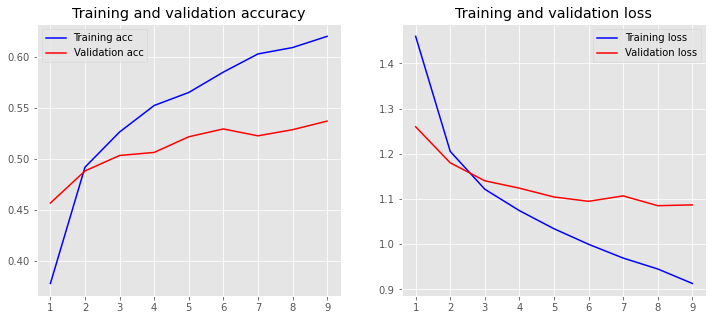

In [14]:
plot_history(history)

I tried optimizing network by: changing activation function(tried tanh and relu), changing size of receptive fields(tried 5x5 and 3x3),changing number of feature maps,looked for best epochs number and batch size, changing optimizer(svg and adam).

In [15]:
print("Accuracy on training data: {}".format(model.evaluate(X_train, Y_train)))
print("Accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

556/556 [==============================] - 8s 14ms/step - loss: 0.9250 - accuracy: 0.6235
Accuracy on training data: [0.9250169396400452, 0.623467206954956]
186/186 [==============================] - 3s 15ms/step - loss: 1.0875 - accuracy: 0.5249
Accuracy on test data: [1.087494134902954, 0.5248861312866211]


### Ethnicity
Convolutional Neural Network

In [30]:
y = to_categorical(df['ethnicity'], 5)
scaled = pictures/255
x = np.reshape(scaled,[-1,48,48,1])
X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify = y,random_state=69)


model = Sequential()
model.add(Conv2D(32, (3,3), activation='tanh', input_shape=X_train[0].shape)) #32 feature maps, 3*3 local receptive fields
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units = 5, activation = 'softmax')) 

sgd = optimizers.SGD(learning_rate = 0.1) 

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy']) 

history = model.fit(X_train, Y_train, epochs = 35, batch_size = 100, verbose = 1, validation_split = 0.3)

Epoch 1/35
125/125 [==============================] - 15s 111ms/step - loss: 1.3994 - accuracy: 0.4299 - val_loss: 1.3453 - val_accuracy: 0.4458
Epoch 2/35
125/125 [==============================] - 13s 100ms/step - loss: 1.3114 - accuracy: 0.4797 - val_loss: 1.2708 - val_accuracy: 0.4820
Epoch 3/35
125/125 [==============================] - 13s 102ms/step - loss: 1.2312 - accuracy: 0.5268 - val_loss: 1.2140 - val_accuracy: 0.5697
Epoch 4/35
125/125 [==============================] - 14s 111ms/step - loss: 1.1701 - accuracy: 0.5491 - val_loss: 1.2959 - val_accuracy: 0.4996
Epoch 5/35
125/125 [==============================] - 14s 111ms/step - loss: 1.1237 - accuracy: 0.5710 - val_loss: 1.1024 - val_accuracy: 0.5737
Epoch 6/35
125/125 [==============================] - 14s 110ms/step - loss: 1.0914 - accuracy: 0.5862 - val_loss: 1.0756 - val_accuracy: 0.6170
Epoch 7/35
125/125 [==============================] - 14s 111ms/step - loss: 1.0556 - accuracy: 0.6075 - val_loss: 1.0601 - val_ac

556/556 [==============================] - 8s 14ms/step - loss: 0.8329 - accuracy: 0.7136
Accuracy on training data: [0.8329448699951172, 0.7135785818099976]
186/186 [==============================] - 3s 14ms/step - loss: 0.8380 - accuracy: 0.7083
Accuracy on test data: [0.8379548192024231, 0.7082841396331787]


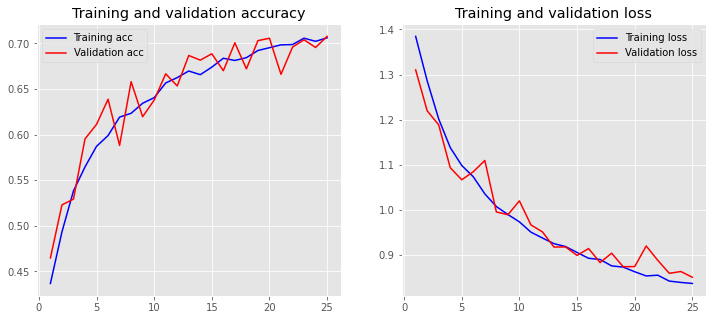

In [29]:
plot_history(history)
print("Accuracy on training data: {}".format(model.evaluate(X_train, Y_train)))
print("Accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.